In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

import matplotlib.pyplot as plt

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


0.7668656423687935
61.91407165527344
230.90294895172119
51.58720245361328
61.91407165527344
184.31912536621093
18425.7318359375
18432.3216796875
18425.6873046875
18425.7318359375
4577.7291015625
457766.69375
457772.709375
457766.75625
457766.69375
6.970829796791077
5.108643913269043
5.108643913269043
4.999689531326294
5.108643913269043
7.6264440536499025
5.608037710189819
5.608037710189819
4.999691486358643
5.608037710189819
10.05239839553833
7.1110461235046385
7.1110461235046385
4.999698257446289
7.1110461235046385
114.79850921630859
114.728515625
114.728515625
114.42523803710938
114.728515625
11443.509375
11442.81142578125
11442.81142578125
11439.965234375
11442.81142578125
286011.1
286007.6171875
286007.6171875
285993.4703125
286007.6171875


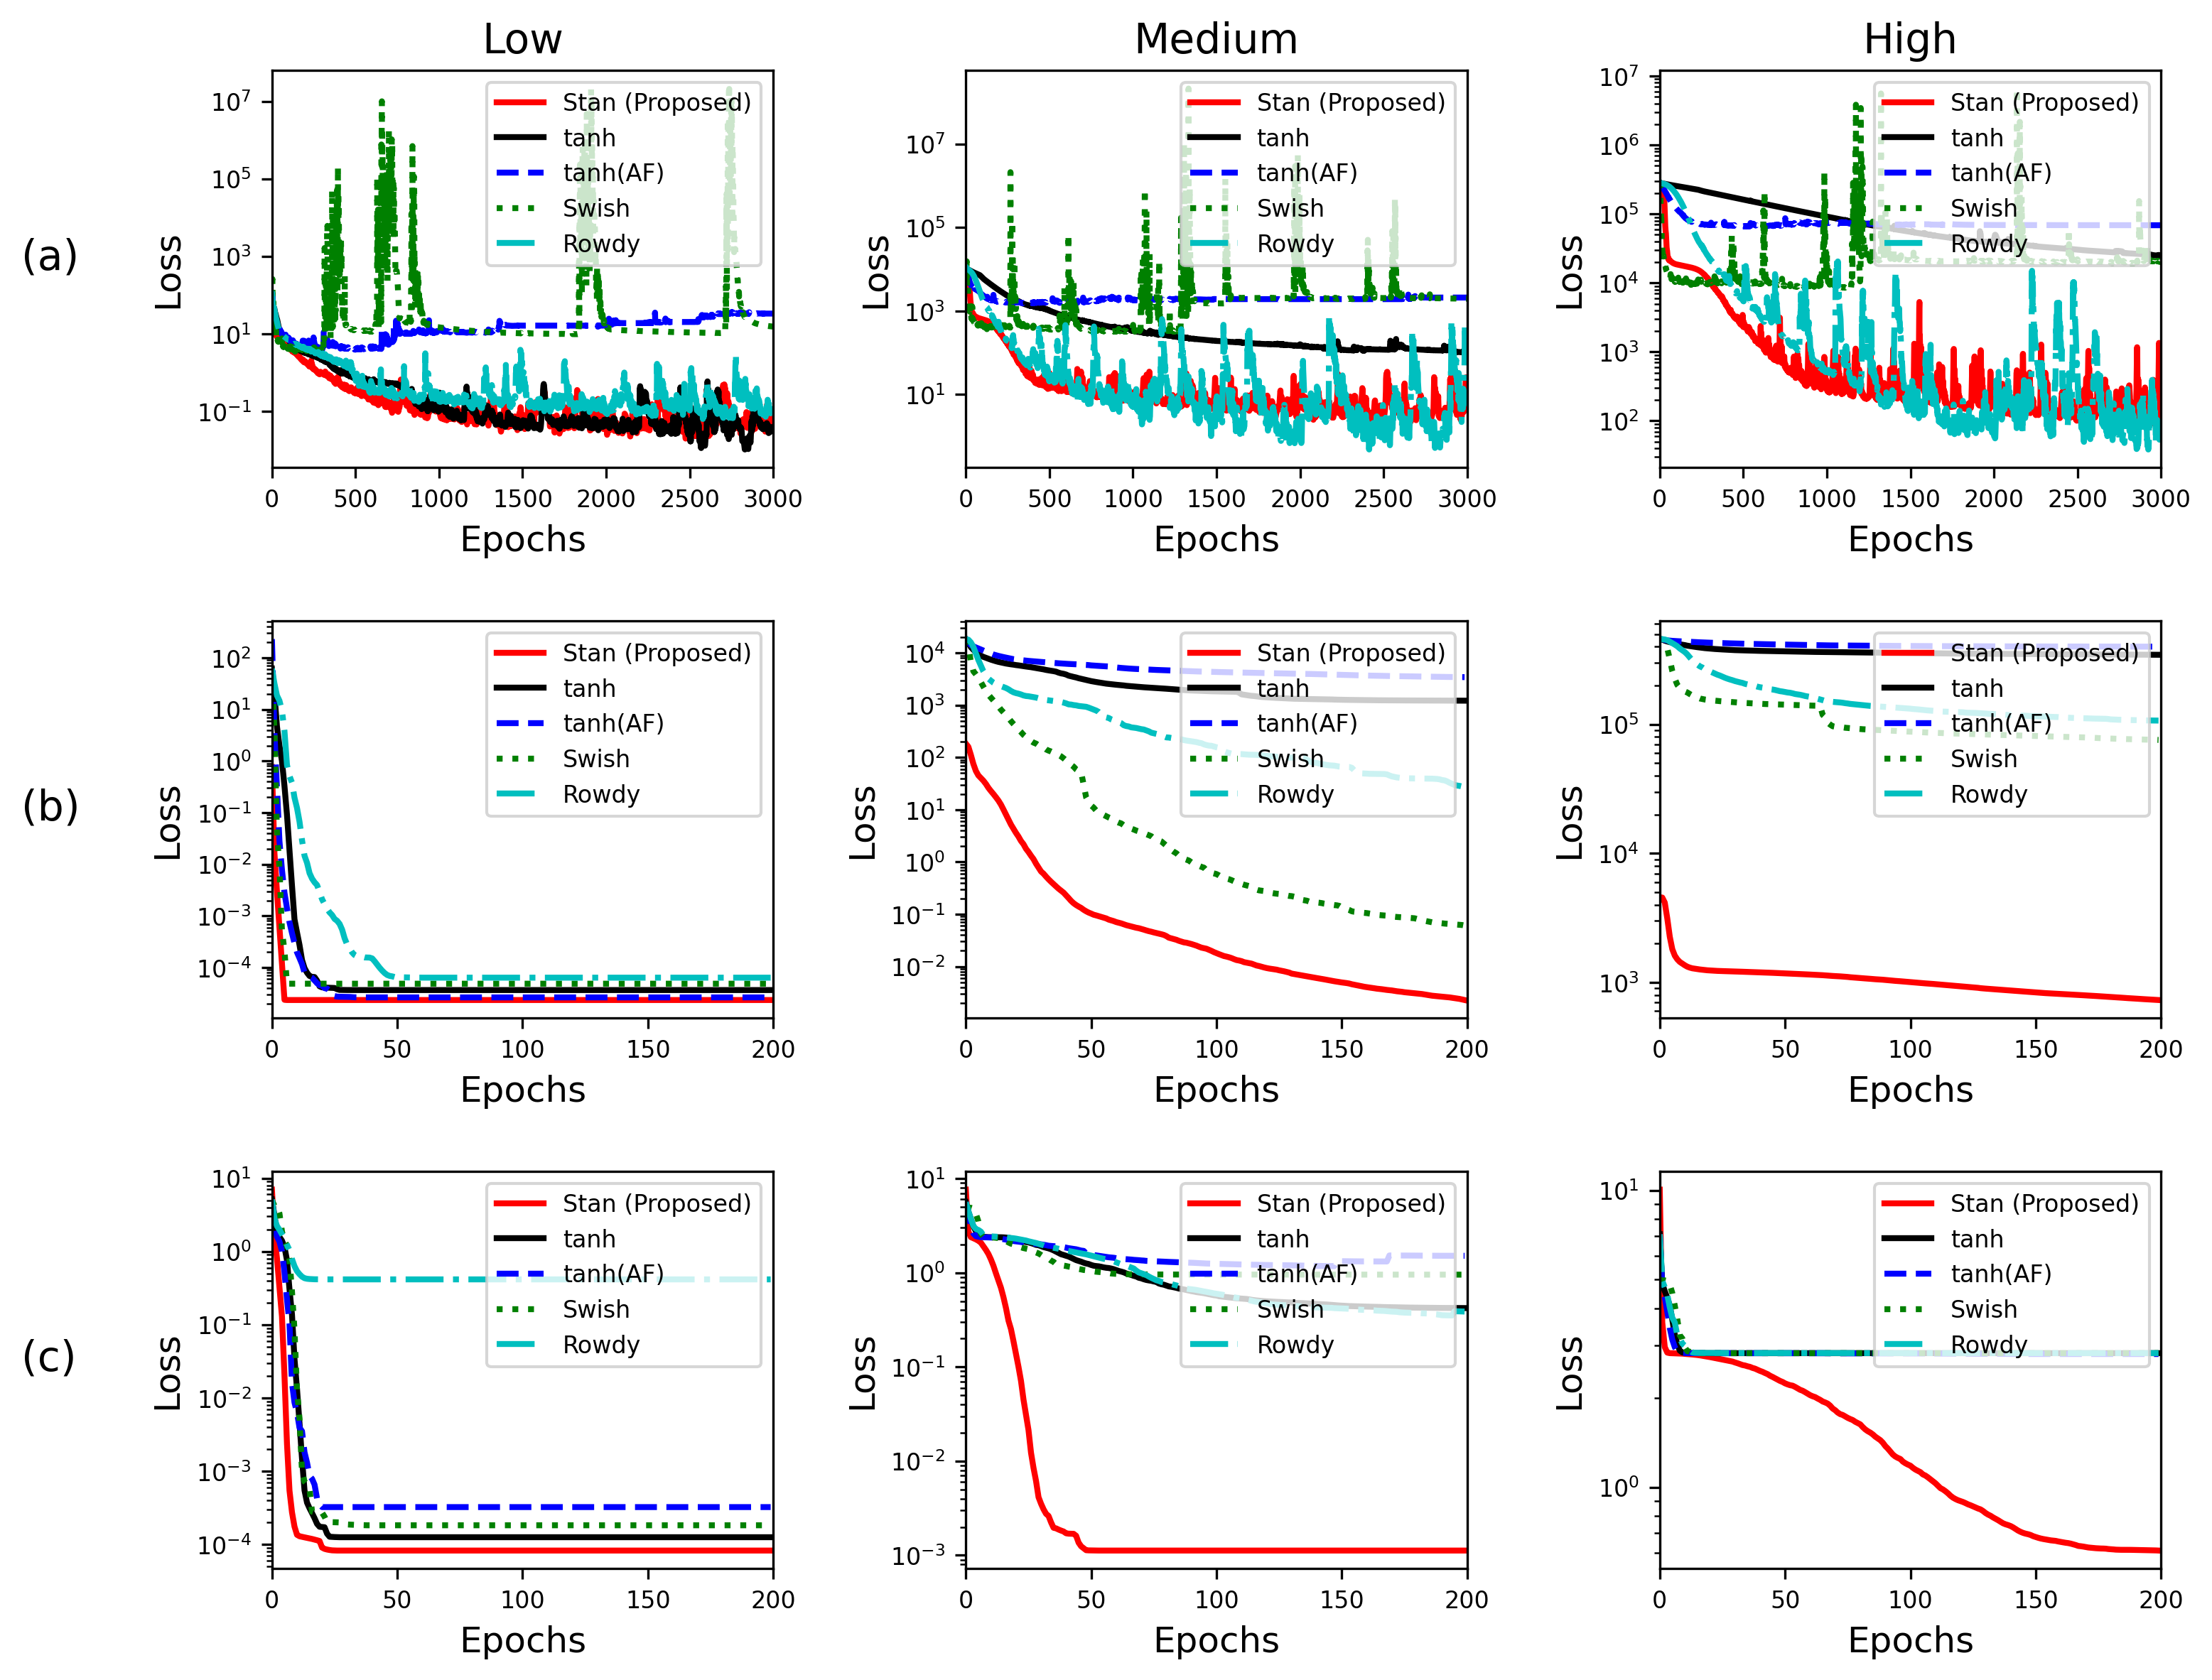

In [3]:
fig, axs = plt.subplots(3,3)
fig.dpi=300
fig.tight_layout()

prob_folder = './1D/FODE_mod/'
prob_name = "1D_FODE_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

num_steps = 200
reps = 10

i = 0
ax = axs[1,:]

for level in levels:
    ax[i].figure.set_size_inches(10,2.5)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,200])
    i = i+1
    
#ax[0,0].set_title('Smooth Function',fontsize=18, math_fontfamily='cm')
# ax[0,0].set_title('Regression Problem',fontsize=18, math_fontfamily='cm')
# ax[0,1].set_title('First-order ODE',fontsize=18, math_fontfamily='cm')
# ax[0,2].set_title('Second-order ODE',fontsize=18, math_fontfamily='cm')

# plot_rows = ['(a)','(b)']

# for i in range(2):
#     ax[i,0].text(-0.5,0.5,plot_rows[i],fontsize=18,transform=ax[i,0].transAxes)


# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace =0.3, hspace=0.4)
# plt.savefig('1D_Loss_Beta.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------

prob_folder = './1D/SODE/'
prob_name = "1D_SODE_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

num_steps = 200
reps = 10
ax = axs[2,:]
i = 0

for level in levels:
    ax[i].figure.set_size_inches(10,2.5)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,200])
    i = i+1
    
#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------

prob_folder = './Regression/'
prob_name = "Regr_disc_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

ax = axs[0,:]
num_steps = 3000
reps = 10

i = 0

for level in levels:
    ax[i].figure.set_size_inches(10,8)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(np.linspace(0,num_steps-1,num_steps),mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,num_steps])
    i = i+1
    
plt_titles = ["Low","Medium","High"]   
for i in range(3):
    axs[0,i].set_title(plt_titles[i],fontsize=14, math_fontfamily='cm')    
    
plot_rows = ['(a)','(b)','(c)']

for i in range(3):
    axs[i,0].text(-0.5,0.5,plot_rows[i],fontsize=14,transform=axs[i,0].transAxes)
    
plt.savefig('Numerical_loss_train.pdf', format='pdf',pad_inches=0, bbox_inches='tight')